In [32]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
# Load the CSV file
data=pd.read_csv('amazon.csv')

In [34]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [35]:
# Data Cleaning
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

In [36]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [37]:
data = data.dropna()

# Handle infinite values by replacing them with NaNs and then dropping those rows
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Defining the dependent and independent variables
X = data[['rating', 'rating_count', 'actual_price', 'discount_percentage']]
y = data['discounted_price']

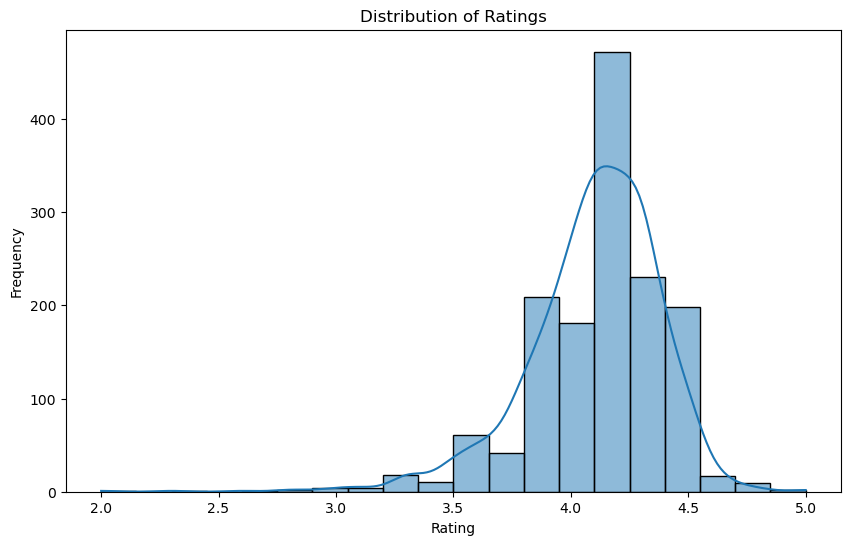

In [38]:
# Summary statistics
summary_stats = data.describe()

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



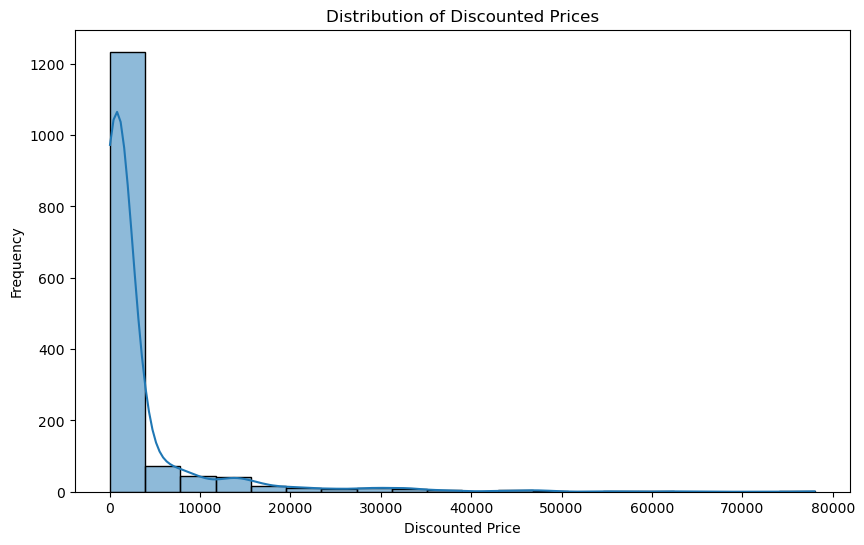

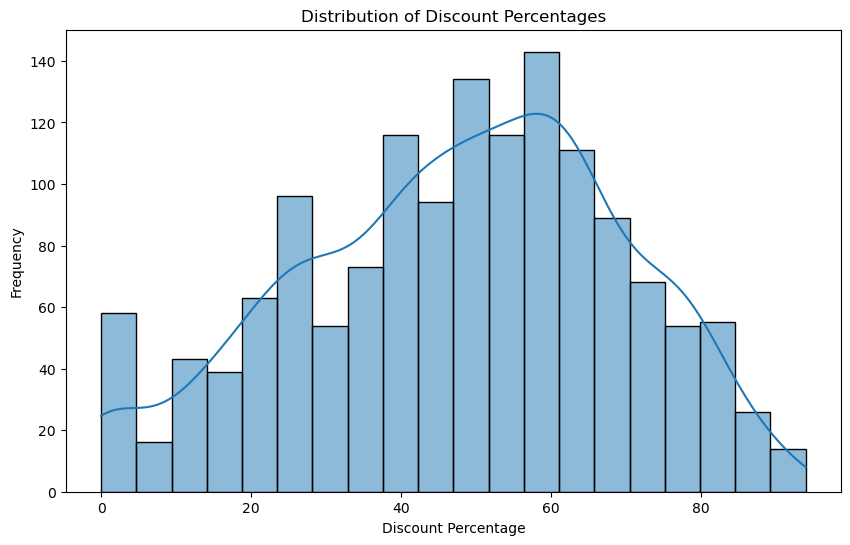

In [39]:
# Analysis of pricing and discount patterns
plt.figure(figsize=(10, 6))
sns.histplot(data['discounted_price'], bins=20, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['discount_percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()



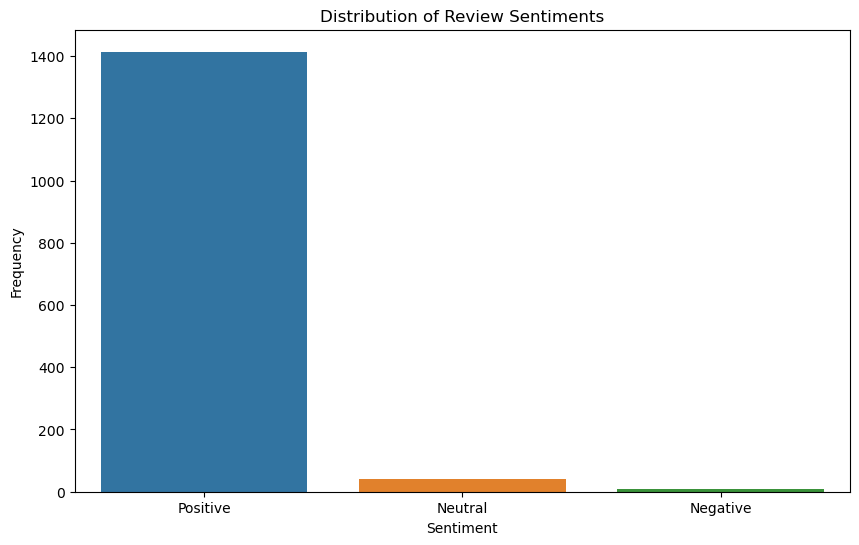

       discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000  


In [40]:
# Basic sentiment analysis using a word list approach
positive_words = ['good', 'great', 'excellent', 'amazing', 'fantastic', 'satisfied', 'happy']
negative_words = ['bad', 'terrible', 'poor', 'horrible', 'dissatisfied', 'unhappy']

def get_sentiment(review):
    review = review.lower()
    if any(word in review for word in positive_words):
        return 'Positive'
    elif any(word in review for word in negative_words):
        return 'Negative'
    else:
        return 'Neutral'

data['review_sentiment'] = data['review_title'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data['review_sentiment'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print(summary_stats)

In [41]:
#EDA

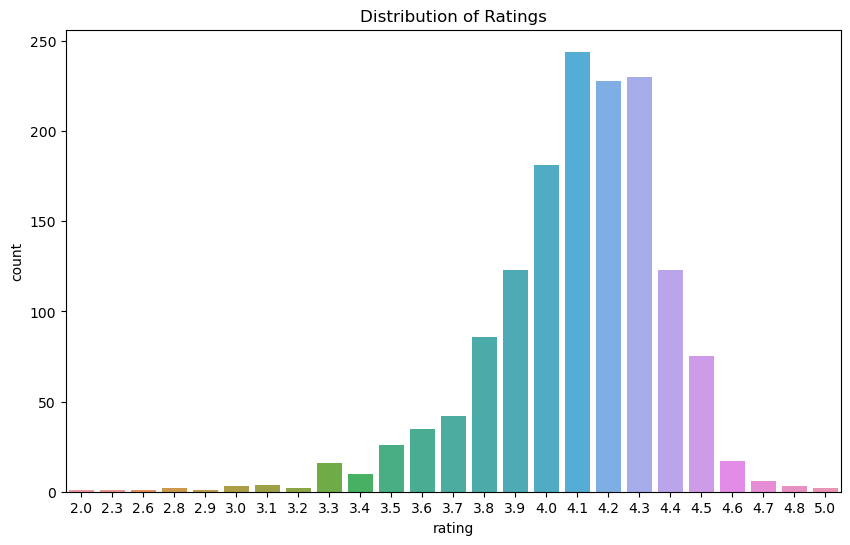

In [42]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data)
plt.title('Distribution of Ratings')
plt.show()

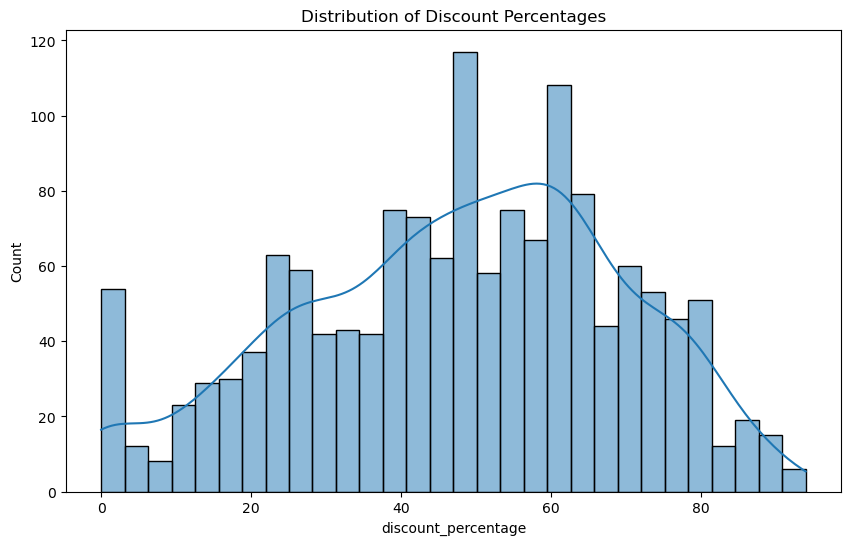

In [43]:
# Distribution of discount percentages
plt.figure(figsize=(10, 6))
sns.histplot(data['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentages')
plt.show()

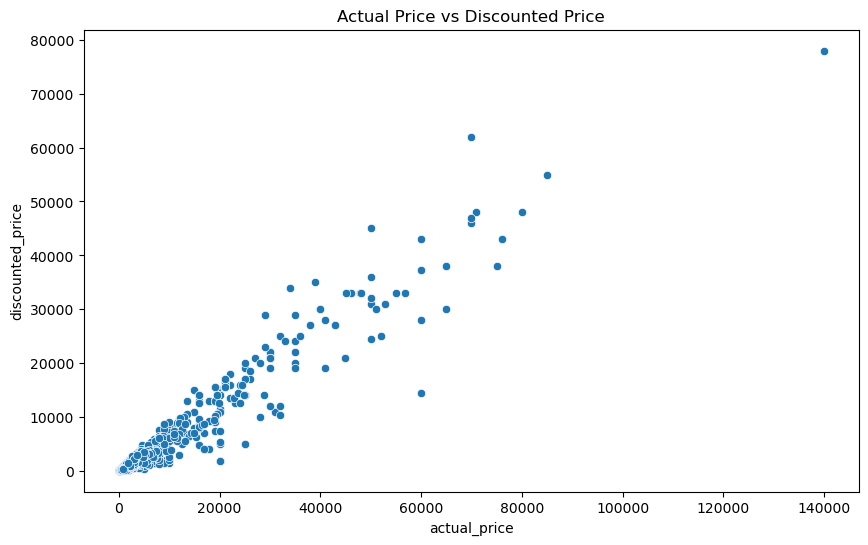

In [44]:
# Relationship between actual price and discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=data)
plt.title('Actual Price vs Discounted Price')
plt.show()

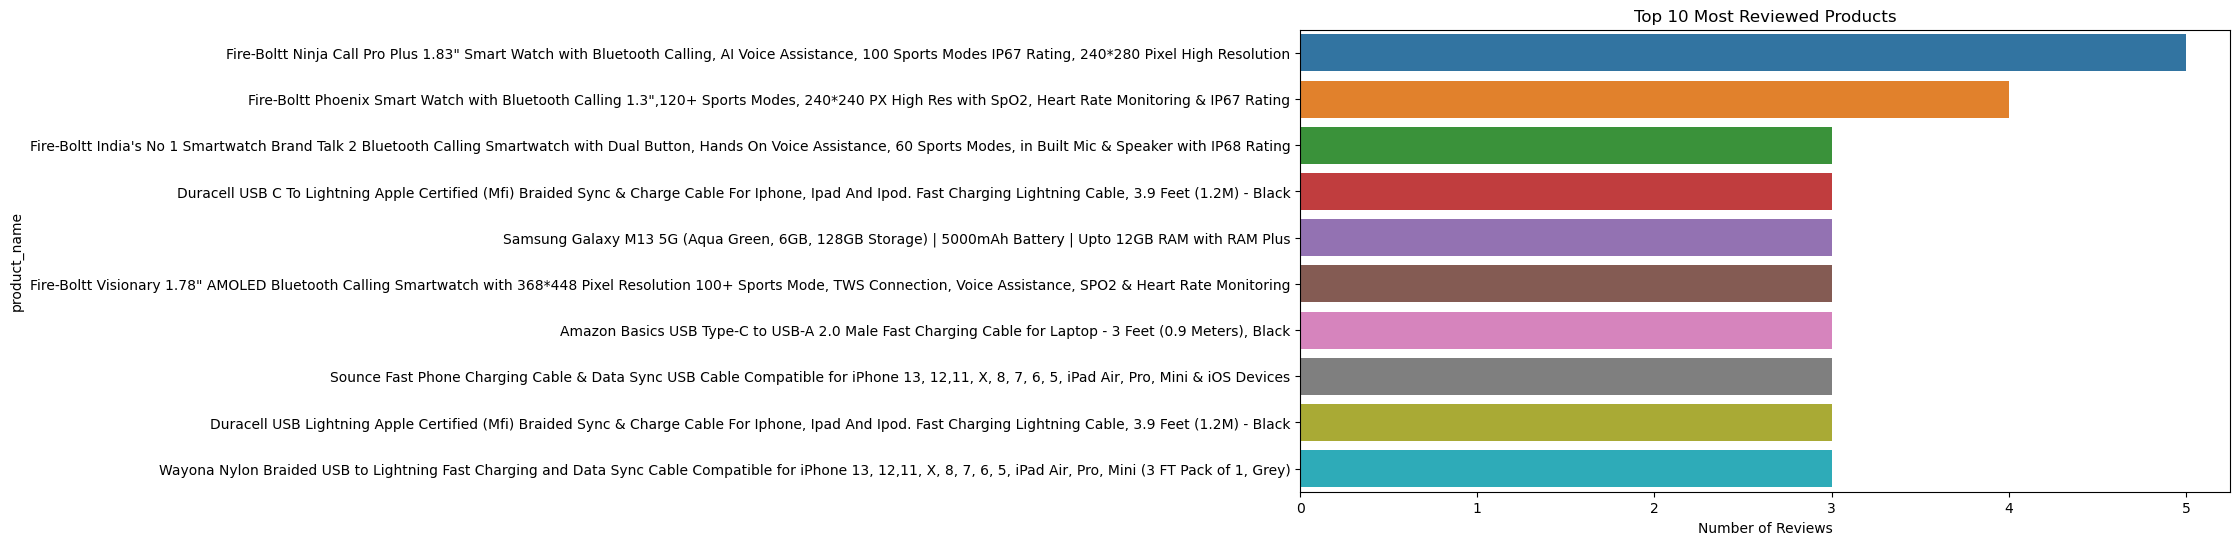

In [45]:
# Top 10 most reviewed products
top_10_reviewed_products = data.groupby('product_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_reviewed_products.values, y=top_10_reviewed_products.index)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.show()


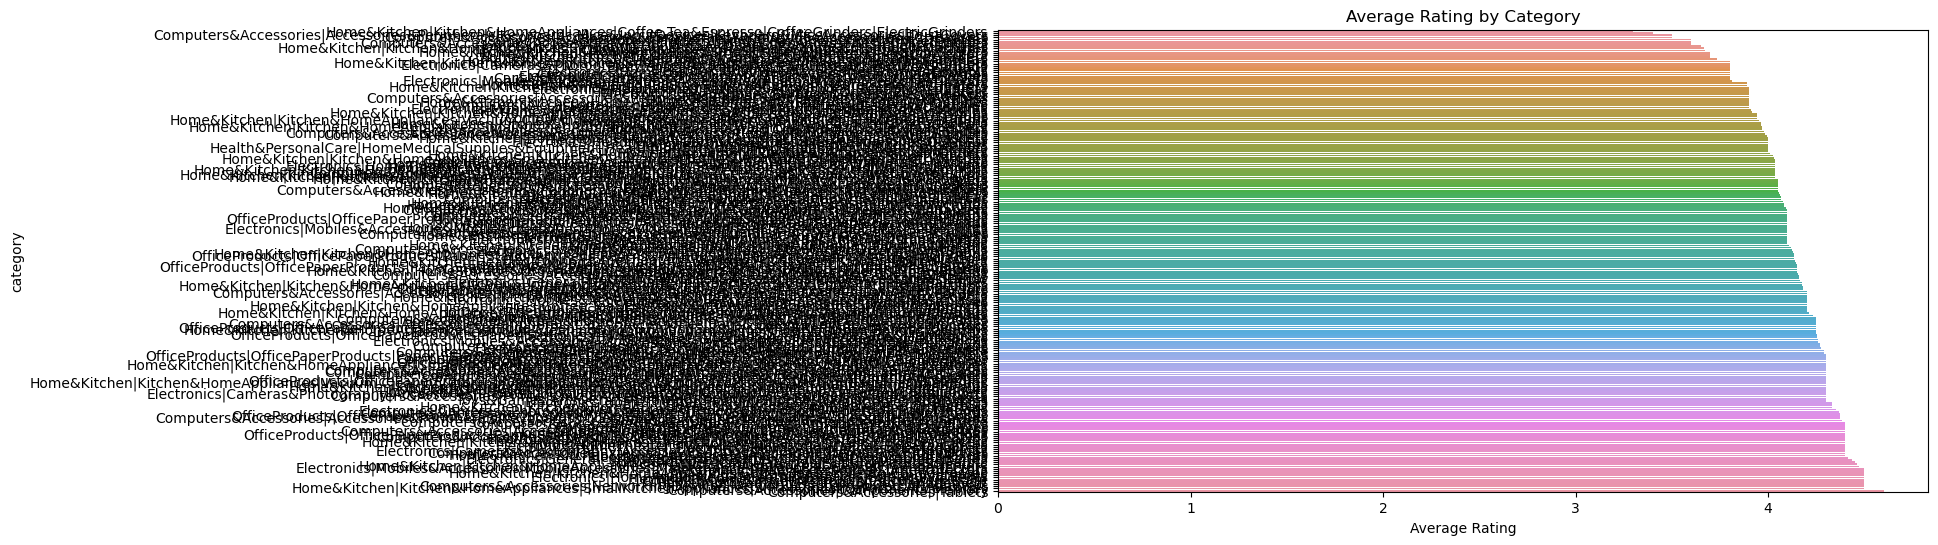

In [46]:
# Average rating by category
avg_rating_by_category = data.groupby('category')['rating'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index)
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.show()


C:\Users\niranjan\AppData\Local\Temp\ipykernel_64448\1411292530.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


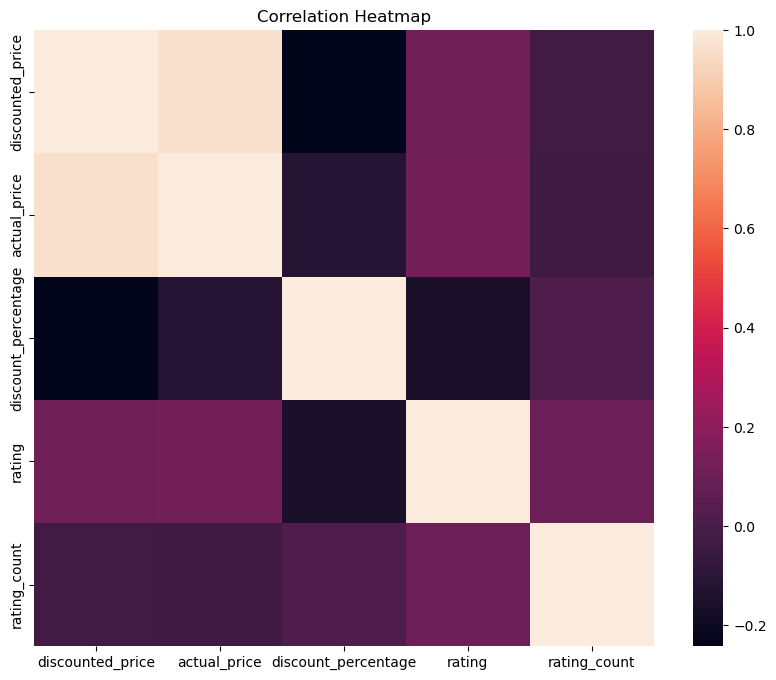

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr())
plt.title('Correlation Heatmap')
plt.show()

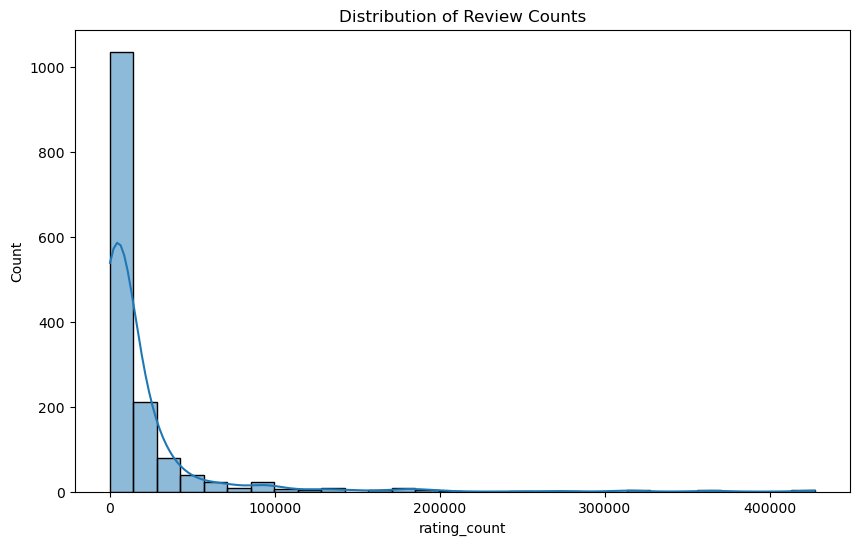

In [48]:
# Review count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['rating_count'], bins=30, kde=True)
plt.title('Distribution of Review Counts')
plt.show()

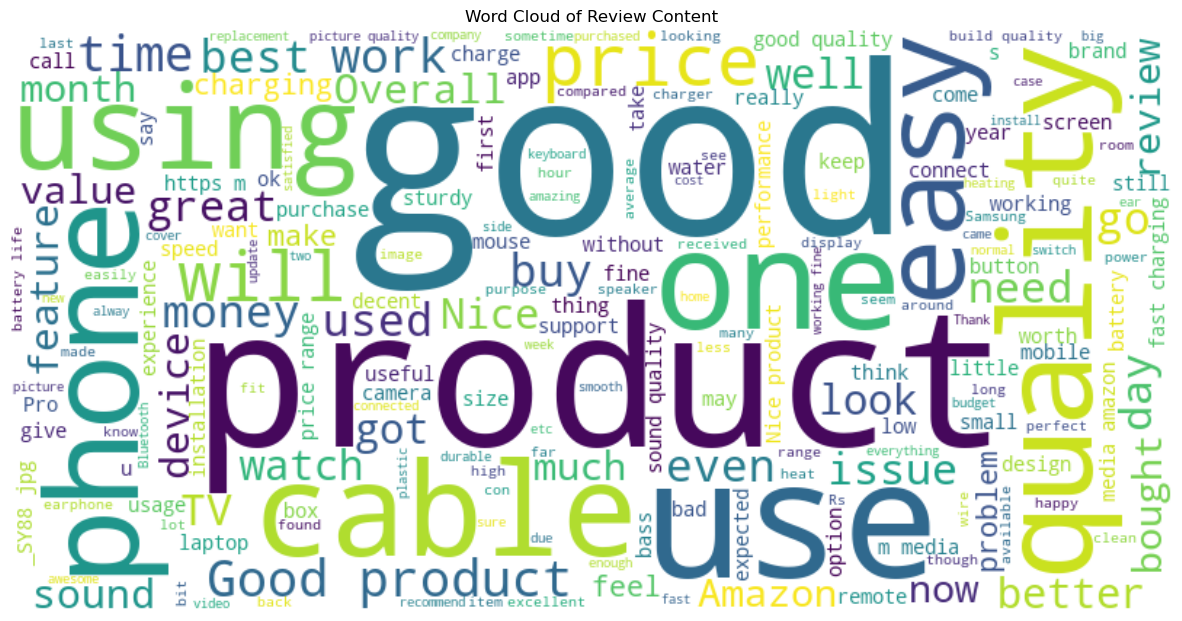

In [49]:
# Word cloud for review content (optional, requires wordcloud library)
from wordcloud import WordCloud

review_content = ' '.join(data['review_content'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_content)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()

In [50]:
# Machine Learning: Linear Regression to predict discounted price
# Selecting relevant features
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count']
target = 'discounted_price'

In [51]:
# Dropping rows with missing values in the relevant columns
df_ml = data.dropna(subset=features + [target])


In [52]:
# Splitting the data into training and testing sets
X = df_ml[features]
y = df_ml[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

                            OLS Regression Results                            
Dep. Variable:       discounted_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     5967.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:42:50   Log-Likelihood:                -12920.
No. Observations:                1462   AIC:                         2.585e+04
Df Residuals:                    1457   BIC:                         2.588e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3494.7112    

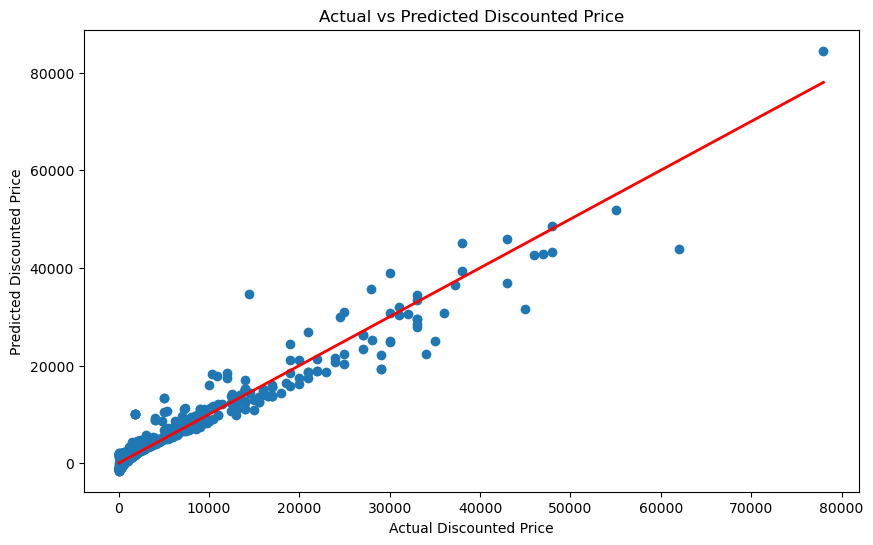

In [57]:
# Defining the dependent and independent variables
X = data[['rating', 'rating_count', 'actual_price', 'discount_percentage']]
y = data['discounted_price']

# Adding a constant to the independent variables matrix
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Getting the model summary
summary = model.summary()
print(summary)

# Plotting the actual vs predicted values
predictions = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('Actual vs Predicted Discounted Price')
plt.show()

In [ ]:
!pip install wordcloud